In [2]:
import pandas as pd
import numpy as np
import cv2
import tensorflow as tf
from sklearn import datasets
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, accuracy_score
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import precision_score, recall_score, f1_score, confusion_matrix, accuracy_score

# Load digits dataset
digits = datasets.load_digits()
labels = digits.target
images = digits.images

data = []

# Process images to extract contours and moments
for idx, image in enumerate(images):
    image_uint8 = np.uint8(image)
    ret, thresh = cv2.threshold(image_uint8, 0, 255, cv2.THRESH_BINARY + cv2.THRESH_OTSU)
    contours, hierarchy = cv2.findContours(thresh, cv2.RETR_TREE, cv2.CHAIN_APPROX_SIMPLE)

    img_moment = []

    for cnt in contours:
        M = cv2.moments(cnt)
        img_moment.extend(list(M.values()))

    data.append(img_moment)

# Pad sequences to have the same length
max_length = max(len(item) for item in data)
data = [np.pad(seq, (0, max_length - len(seq)), 'constant') for seq in data]

# Convert data to DataFrame
df_data = pd.DataFrame(data)
df_data = df_data.astype('float32')

# Split the data
X_train, X_test, y_train, y_test = train_test_split(
    df_data, digits.target, test_size=0.2, shuffle=False
)

# Define the model
model = tf.keras.Sequential([
    tf.keras.layers.Input(shape=(max_length,)),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(128, activation='relu'),
    tf.keras.layers.Dense(10)
])

# Compile the model
model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

# Train the model
model.fit(X_train, y_train, epochs=100)

# Evaluate the model
test_loss, test_acc = model.evaluate(X_test, y_test, verbose=2)

print('\nTest accuracy:', test_acc)


Epoch 1/100
45/45 ━━━━━━━━━━━━━━━━━━━━ 0s 614us/step - accuracy: 0.1902 - loss: 77.6406  
Epoch 2/100
45/45 ━━━━━━━━━━━━━━━━━━━━ 0s 599us/step - accuracy: 0.4056 - loss: 7.5879
Epoch 3/100
45/45 ━━━━━━━━━━━━━━━━━━━━ 0s 568us/step - accuracy: 0.5422 - loss: 3.5509
Epoch 4/100
45/45 ━━━━━━━━━━━━━━━━━━━━ 0s 568us/step - accuracy: 0.5495 - loss: 3.1460
Epoch 5/100
45/45 ━━━━━━━━━━━━━━━━━━━━ 0s 591us/step - accuracy: 0.6266 - loss: 2.4061
Epoch 6/100
45/45 ━━━━━━━━━━━━━━━━━━━━ 0s 568us/step - accuracy: 0.6618 - loss: 1.8789
Epoch 7/100
45/45 ━━━━━━━━━━━━━━━━━━━━ 0s 545us/step - accuracy: 0.6761 - loss: 2.4476
Epoch 8/100
45/45 ━━━━━━━━━━━━━━━━━━━━ 0s 546us/step - accuracy: 0.6841 - loss: 1.5611
Epoch 9/100
45/45 ━━━━━━━━━━━━━━━━━━━━ 0s 557us/step - accuracy: 0.7051 - loss: 1.7375
Epoch 10/100
45/45 ━━━━━━━━━━━━━━━━━━━━ 0s 545us/step - accuracy: 0.6960 - loss: 1.5691
Epoch 11/100
45/45 ━━━━━━━━━━━━━━━━━━━━ 0s 534us/step - accuracy: 0.7108 - loss: 1.5245
Epoch 12/100
45/45 ━━━━━━━━━━━━━━━━━━━

12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step 


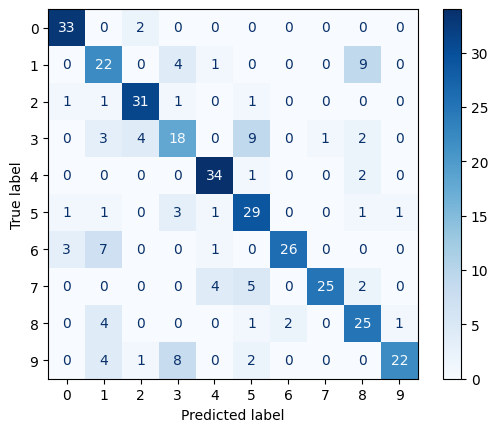

In [3]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
# Predict the labels for the test set
y_pred = np.argmax(model.predict(X_test), axis=1)

# Generate the confusion matrix
cm = confusion_matrix(y_test, y_pred)

# Plot the confusion matrix
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=digits.target_names)
disp.plot(cmap=plt.cm.Blues)

plt.show()

In [4]:
# Make predictions
y_pred = np.argmax(model.predict(X_test), axis=-1)

# Calculate metrics
conf_matrix = confusion_matrix(y_test, y_pred)
precision = precision_score(y_test, y_pred, average='weighted')
# recall = recall_score(y_test, y_pred, average='weighted')
# f1 = f1_score(y_test, y_pred, average='weighted')
accuracy = accuracy_score(y_test, y_pred)

print('\nConfusion Matrix:\n', conf_matrix)
print('\nPrecision:', precision)
# print('\nRecall:', recall)
# print('\nF1-Score:', f1)
print("\nAccuracy: ", accuracy)

12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 455us/step

Confusion Matrix:
 [[33  0  2  0  0  0  0  0  0  0]
 [ 0 22  0  4  1  0  0  0  9  0]
 [ 1  1 31  1  0  1  0  0  0  0]
 [ 0  3  4 18  0  9  0  1  2  0]
 [ 0  0  0  0 34  1  0  0  2  0]
 [ 1  1  0  3  1 29  0  0  1  1]
 [ 3  7  0  0  1  0 26  0  0  0]
 [ 0  0  0  0  4  5  0 25  2  0]
 [ 0  4  0  0  0  1  2  0 25  1]
 [ 0  4  1  8  0  2  0  0  0 22]]

Precision: 0.7595582928526513

Accuracy:  0.7361111111111112


In [5]:
import pandas as pd
import numpy as np
import cv2
import tensorflow as tf
from sklearn import datasets
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, accuracy_score
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import precision_score, recall_score, f1_score, confusion_matrix, accuracy_score

digits = datasets.load_digits()
labels = digits.target
images = digits.images

data = []

for idx, image in enumerate(images):
    image_uint8 = np.uint8(image)
    ret, thresh = cv2.threshold(image_uint8, 0, 255, cv2.THRESH_BINARY + cv2.THRESH_OTSU)
    contours, hierarchy = cv2.findContours(thresh, cv2.RETR_TREE, cv2.CHAIN_APPROX_SIMPLE)

    img_Rect = []

    for cnt in contours:
        x, y, w, h = cv2.boundingRect(cnt)
        img_Rect.extend([x, y, w, h])
    data.append(img_Rect)


max_length = max(len(item) for item in data)
data = [np.pad(seq, (0, max_length - len(seq)), 'constant') for seq in data]


df_data = pd.DataFrame(data)
df_data = df_data.astype('float32')

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(
    df_data, digits.target, test_size=0.2, shuffle=False
)

import tensorflow as tf
model = tf.keras.Sequential([
    tf.keras.layers.Input(shape=(max_length,)),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(128, activation='relu'),
    tf.keras.layers.Dense(10)
])

model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

model.fit(X_train, y_train, epochs=100)

test_loss, test_acc = model.evaluate(X_test, y_test, verbose=2)

print('\nTest accuracy:', test_acc)



Epoch 1/100
45/45 ━━━━━━━━━━━━━━━━━━━━ 0s 750us/step - accuracy: 0.1763 - loss: 2.4361 
Epoch 2/100
45/45 ━━━━━━━━━━━━━━━━━━━━ 0s 523us/step - accuracy: 0.3750 - loss: 1.7733
Epoch 3/100
45/45 ━━━━━━━━━━━━━━━━━━━━ 0s 523us/step - accuracy: 0.4299 - loss: 1.6870
Epoch 4/100
45/45 ━━━━━━━━━━━━━━━━━━━━ 0s 523us/step - accuracy: 0.4054 - loss: 1.6351
Epoch 5/100
45/45 ━━━━━━━━━━━━━━━━━━━━ 0s 500us/step - accuracy: 0.4288 - loss: 1.6037
Epoch 6/100
45/45 ━━━━━━━━━━━━━━━━━━━━ 0s 512us/step - accuracy: 0.4867 - loss: 1.5221
Epoch 7/100
45/45 ━━━━━━━━━━━━━━━━━━━━ 0s 546us/step - accuracy: 0.4617 - loss: 1.5190
Epoch 8/100
45/45 ━━━━━━━━━━━━━━━━━━━━ 0s 535us/step - accuracy: 0.4663 - loss: 1.4653
Epoch 9/100
45/45 ━━━━━━━━━━━━━━━━━━━━ 0s 500us/step - accuracy: 0.5287 - loss: 1.4308
Epoch 10/100
45/45 ━━━━━━━━━━━━━━━━━━━━ 0s 546us/step - accuracy: 0.4590 - loss: 1.4804
Epoch 11/100
45/45 ━━━━━━━━━━━━━━━━━━━━ 0s 500us/step - accuracy: 0.4915 - loss: 1.4568
Epoch 12/100
45/45 ━━━━━━━━━━━━━━━━━━━━ 

12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step 


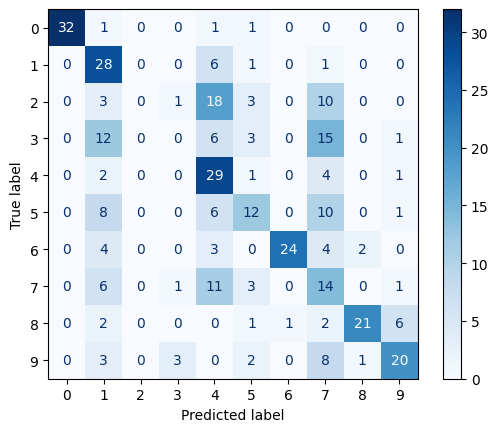

In [6]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
# Predict the labels for the test set
y_pred = np.argmax(model.predict(X_test), axis=1)

# Generate the confusion matrix
cm = confusion_matrix(y_test, y_pred)

# Plot the confusion matrix
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=digits.target_names)
disp.plot(cmap=plt.cm.Blues)

plt.show()

In [7]:
# Make predictions
y_pred = np.argmax(model.predict(X_test), axis=-1)

# Calculate metrics
conf_matrix = confusion_matrix(y_test, y_pred)
precision = precision_score(y_test, y_pred, average='weighted')
# recall = recall_score(y_test, y_pred, average='weighted')
# f1 = f1_score(y_test, y_pred, average='weighted')
accuracy = accuracy_score(y_test, y_pred)

print('\nConfusion Matrix:\n', conf_matrix)
print('\nPrecision:', precision)
# print('\nRecall:', recall)
# print('\nF1-Score:', f1)
print("\nAccuracy: ", accuracy)

12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 546us/step

Confusion Matrix:
 [[32  1  0  0  1  1  0  0  0  0]
 [ 0 28  0  0  6  1  0  1  0  0]
 [ 0  3  0  1 18  3  0 10  0  0]
 [ 0 12  0  0  6  3  0 15  0  1]
 [ 0  2  0  0 29  1  0  4  0  1]
 [ 0  8  0  0  6 12  0 10  0  1]
 [ 0  4  0  0  3  0 24  4  2  0]
 [ 0  6  0  1 11  3  0 14  0  1]
 [ 0  2  0  0  0  1  1  2 21  6]
 [ 0  3  0  3  0  2  0  8  1 20]]

Precision: 0.4887196429699094

Accuracy:  0.5


c:\Users\xResK\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


In [8]:
import pandas as pd
import numpy as np
import cv2
import tensorflow as tf
from sklearn import datasets
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, accuracy_score
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import precision_score, recall_score, f1_score, confusion_matrix, accuracy_score

digits = datasets.load_digits()
labels = digits.target
images = digits.images

data = []

moment_keys = [
    "m00", "m10", "m01", "m20", "m11", "m02", "m30", "m21", "m12", "m03",
    "mu20", "mu11", "mu02", "mu30", "mu21", "mu12", "mu03",
    "nu20", "nu11", "nu02", "nu30", "nu21", "nu12", "nu03"
]

for image in images:
    image_uint8 = np.uint8(image)
    ret, thresh = cv2.threshold(image_uint8, 0, 255, cv2.THRESH_BINARY + cv2.THRESH_OTSU)
    contours, hierarchy = cv2.findContours(thresh, cv2.RETR_TREE, cv2.CHAIN_APPROX_SIMPLE)
    img_moment = []
    for cnt in contours:
        M = cv2.moments(cnt)
        img_moment.extend([M[key] for key in moment_keys])
        x, y, w, h = cv2.boundingRect(cnt)
        img_moment.extend([x, y, w, h])


    data.append(img_moment)

max_length = max(len(item) for item in data)
data = [np.pad(seq, (0, max_length - len(seq)), 'constant') for seq in data]

df_data = pd.DataFrame(data)
df_data = df_data.astype('float32')

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(
    df_data, digits.target, test_size=0.2, shuffle=False
)

import tensorflow as tf
model = tf.keras.Sequential([
    tf.keras.layers.Input(shape=(max_length,)),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(128, activation='relu'),
    tf.keras.layers.Dense(10)
])

model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

model.fit(X_train, y_train, epochs=100)

test_loss, test_acc = model.evaluate(X_test, y_test, verbose=2)

print('\nTest accuracy:', test_acc)

Epoch 1/100
45/45 ━━━━━━━━━━━━━━━━━━━━ 0s 598us/step - accuracy: 0.1532 - loss: 111.4553 
Epoch 2/100
45/45 ━━━━━━━━━━━━━━━━━━━━ 0s 591us/step - accuracy: 0.4365 - loss: 9.1011
Epoch 3/100
45/45 ━━━━━━━━━━━━━━━━━━━━ 0s 573us/step - accuracy: 0.5104 - loss: 5.4187
Epoch 4/100
45/45 ━━━━━━━━━━━━━━━━━━━━ 0s 568us/step - accuracy: 0.6002 - loss: 4.2915
Epoch 5/100
45/45 ━━━━━━━━━━━━━━━━━━━━ 0s 512us/step - accuracy: 0.5997 - loss: 3.2656
Epoch 6/100
45/45 ━━━━━━━━━━━━━━━━━━━━ 0s 591us/step - accuracy: 0.5885 - loss: 2.9497
Epoch 7/100
45/45 ━━━━━━━━━━━━━━━━━━━━ 0s 783us/step - accuracy: 0.6788 - loss: 2.2274
Epoch 8/100
45/45 ━━━━━━━━━━━━━━━━━━━━ 0s 613us/step - accuracy: 0.6237 - loss: 2.1006
Epoch 9/100
45/45 ━━━━━━━━━━━━━━━━━━━━ 0s 648us/step - accuracy: 0.6636 - loss: 2.4297
Epoch 10/100
45/45 ━━━━━━━━━━━━━━━━━━━━ 0s 591us/step - accuracy: 0.6836 - loss: 2.2652
Epoch 11/100
45/45 ━━━━━━━━━━━━━━━━━━━━ 0s 573us/step - accuracy: 0.6989 - loss: 2.2612
Epoch 12/100
45/45 ━━━━━━━━━━━━━━━━━━━

12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step 


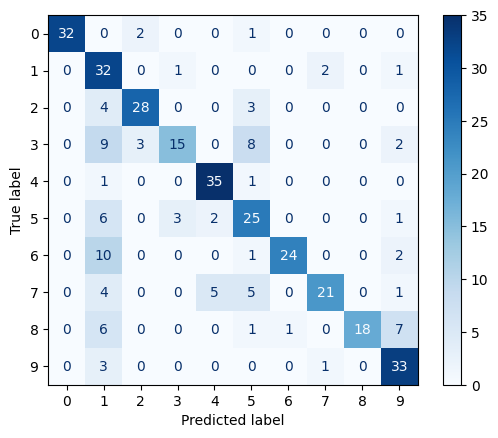

In [9]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
# Predict the labels for the test set
y_pred = np.argmax(model.predict(X_test), axis=1)

# Generate the confusion matrix
cm = confusion_matrix(y_test, y_pred)

# Plot the confusion matrix
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=digits.target_names)
disp.plot(cmap=plt.cm.Blues)

plt.show()

In [10]:
# Make predictions
y_pred = np.argmax(model.predict(X_test), axis=-1)

# Calculate metrics
conf_matrix = confusion_matrix(y_test, y_pred)
precision = precision_score(y_test, y_pred, average='weighted')
# recall = recall_score(y_test, y_pred, average='weighted')
# f1 = f1_score(y_test, y_pred, average='weighted')
accuracy = accuracy_score(y_test, y_pred)

print('\nConfusion Matrix:\n', conf_matrix)
print('\nPrecision:', precision)
# print('\nRecall:', recall)
# print('\nF1-Score:', f1)
print("\nAccuracy: ", accuracy)


12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 545us/step

Confusion Matrix:
 [[32  0  2  0  0  1  0  0  0  0]
 [ 0 32  0  1  0  0  0  2  0  1]
 [ 0  4 28  0  0  3  0  0  0  0]
 [ 0  9  3 15  0  8  0  0  0  2]
 [ 0  1  0  0 35  1  0  0  0  0]
 [ 0  6  0  3  2 25  0  0  0  1]
 [ 0 10  0  0  0  1 24  0  0  2]
 [ 0  4  0  0  5  5  0 21  0  1]
 [ 0  6  0  0  0  1  1  0 18  7]
 [ 0  3  0  0  0  0  0  1  0 33]]

Precision: 0.7962641897386206

Accuracy:  0.7305555555555555
